**Data description**

There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005
14. BILL_AMT2: Amount of bill statement in August, 2005
15. BILL_AMT3: Amount of bill statement in July, 2005
16. BILL_AMT4: Amount of bill statement in June, 2005
17. BILL_AMT5: Amount of bill statement in May, 2005
18. BILL_AMT6: Amount of bill statement in April, 2005
19. PAY_AMT1: Amount of previous payment in September, 2005
20. PAY_AMT2: Amount of previous payment in August, 2005 
21. PAY_AMT3: Amount of previous payment in July, 2005 
22. PAY_AMT4: Amount of previous payment in June, 2005 
23. PAY_AMT5: Amount of previous payment in May, 2005
24. PAY_AMT6: Amount of previous payment in April, 2005
25. default.payment.next.month: Default payment (1=yes, 0=no)

# Reading the dataset

**Importing the libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import pickle
warnings.filterwarnings("ignore")

# Machine learning libraries
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb

**Loading the data**

In [2]:
df = pd.read_csv("/content/UCI_Credit_Card.csv")

**Checking the dataset**

In [3]:
# checking the records
df.shape


(11109, 25)

In [4]:
# previewing the top of the data
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**Measures of central tendancies**

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,11109.000000,11109.00000,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000,11108.000000,11108.000000,1.110800e+04,11108.000000,11108.000000,11108.000000,11108.000000,1.110800e+04,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000
mean,5555.000000,166153.20911,1.579710,1.816545,1.567828,35.384913,0.003061,-0.143307,-0.164371,-0.243316,-0.259519,-0.280853,49877.236136,47955.361721,4.519021e+04,40416.910695,39153.584174,37728.507022,5605.795103,5.736140e+03,4526.452197,4646.181311,4875.469571,5284.370274,0.225423
std,3207.036405,130304.04296,0.493628,0.766260,0.522120,9.315684,1.120965,1.203533,1.215961,1.139580,1.128525,1.160730,72196.769699,70085.931812,6.785330e+04,61318.434825,59428.192388,59139.263814,15404.171925,2.330529e+04,15816.979539,14270.716296,15757.455784,18438.099182,0.417879
min,1.000000,10000.00000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-33350.000000,-3.404100e+04,-170000.000000,-28335.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2778.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3374.750000,2855.000000,2.466250e+03,1939.750000,1487.500000,982.000000,899.000000,6.007500e+02,274.750000,221.500000,200.000000,0.000000,0.000000
50%,5555.000000,140000.00000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21992.000000,21085.500000,1.974350e+04,18474.500000,17705.500000,16319.000000,2100.000000,2.000000e+03,1498.000000,1500.000000,1500.000000,1343.000000,0.000000
75%,8332.000000,240000.00000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64428.750000,61979.250000,5.808225e+04,49648.750000,49227.750000,48113.500000,5001.000000,5.000000e+03,4000.000000,4000.000000,4010.500000,4000.000000,0.000000
max,11109.000000,1000000.00000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,405016.000000,1.684259e+06,896040.000000,497000.000000,388071.000000,528666.000000,1.000000



*   There are 30,000 credit card holders
*   The average limit balance is 167,484
*   The average age of the client is 35
*   Most holders are either graduates or university students






# Cleaning the data

In [6]:
# Checking for missing data
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     1
BILL_AMT2                     1
BILL_AMT3                     1
BILL_AMT4                     1
BILL_AMT5                     1
BILL_AMT6                     1
PAY_AMT1                      1
PAY_AMT2                      1
PAY_AMT3                      1
PAY_AMT4                      1
PAY_AMT5                      1
PAY_AMT6                      1
default.payment.next.month    1
dtype: int64

There are no missing records from our dataset

In [7]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          11109 non-null  int64  
 1   LIMIT_BAL                   11109 non-null  float64
 2   SEX                         11109 non-null  int64  
 3   EDUCATION                   11109 non-null  int64  
 4   MARRIAGE                    11109 non-null  int64  
 5   AGE                         11109 non-null  int64  
 6   PAY_0                       11109 non-null  int64  
 7   PAY_2                       11109 non-null  int64  
 8   PAY_3                       11109 non-null  int64  
 9   PAY_4                       11109 non-null  int64  
 10  PAY_5                       11109 non-null  int64  
 11  PAY_6                       11109 non-null  int64  
 12  BILL_AMT1                   11108 non-null  float64
 13  BILL_AMT2                   111

Most of our columns are either integers or floats


# EDA

**Data exploration**

default.payment.next.month
0.0    8604
1.0    2504
Name: default.payment.next.month, dtype: int64


Text(0.5, 1.0, 'Default payment analysis')

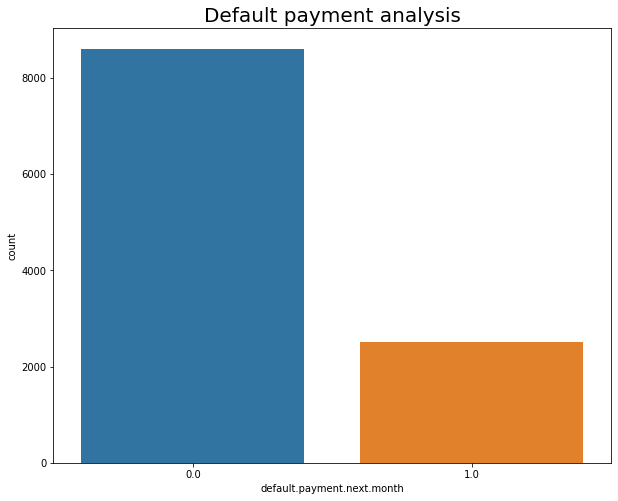

In [8]:
# Analysis of default column
print(df.groupby(['default.payment.next.month'])['default.payment.next.month'].count().sort_values(ascending = False).head(2))
# Create the plot
fig, axes = plt.subplots(figsize = (10,8))
sns.countplot(data = df, x = "default.payment.next.month")
count = df["default.payment.next.month"].value_counts()
sns.set_color_codes("pastel")
locs, labels = plt.xticks()
plt.title("Default payment analysis", fontsize=20)

# 1= default
# 0 = No default


50000.0    1329
20000.0     720
30000.0     606
Name: LIMIT_BAL, dtype: int64


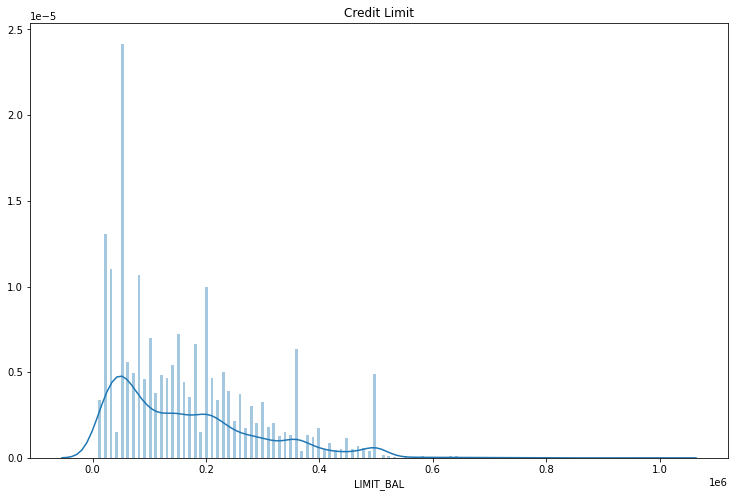

In [9]:
# Analysing the amount of credit limit
print(df['LIMIT_BAL'].value_counts().head(3))

# Visualising amount of credit limit
plt.figure(figsize = (12.5,8))
plt.title('Credit Limit')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200)
plt.show()

From the bar chart above, around 20% of the creditholders defaulted; and the largest group of amount of credit is 50,000

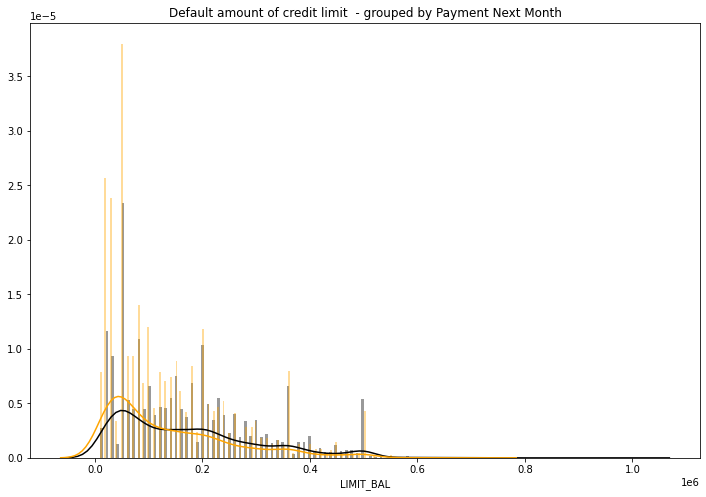

In [10]:
# Amount of credit limit grouped by default payment next month
group_1 = df.loc[df['default.payment.next.month'] == 0]["LIMIT_BAL"]
group_2 = df.loc[df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (12,8))
plt.title('Default amount of credit limit  - grouped by Payment Next Month')
sns.set_color_codes("pastel")
sns.distplot(group_1,kde=True,bins=200, color="black")
sns.distplot(group_2,kde=True,bins=200, color="orange")
plt.show()

# Correlation

Correlation of Amount of bill statement in April - September 2005.

           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.954364   0.877065   0.859553   0.841312   0.818760
BILL_AMT2   0.954364   1.000000   0.909237   0.890316   0.871078   0.844889
BILL_AMT3   0.877065   0.909237   1.000000   0.912724   0.886924   0.861574
BILL_AMT4   0.859553   0.890316   0.912724   1.000000   0.949562   0.910330
BILL_AMT5   0.841312   0.871078   0.886924   0.949562   1.000000   0.948477
BILL_AMT6   0.818760   0.844889   0.861574   0.910330   0.948477   1.000000


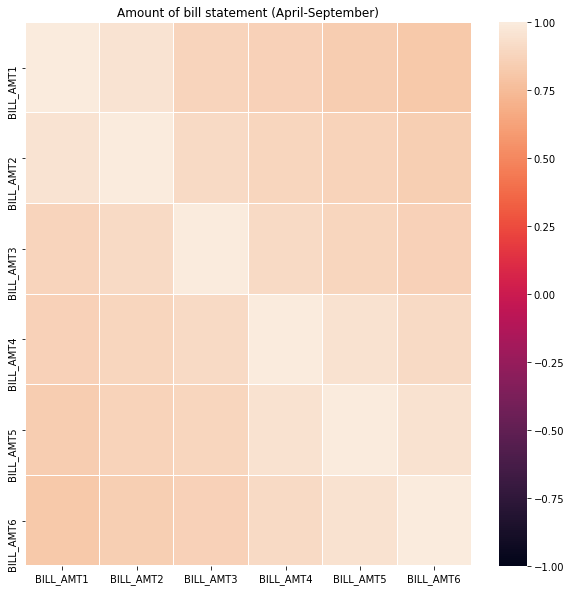

In [11]:
Billed_Amount = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (10,10))
plt.title('Amount of bill statement (April-September)')
corr = df[Billed_Amount].corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is weakening with increased distance in the months. The lowest correlation is between September and December while the highest correlation is between April and May

          PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
PAY_AMT1  1.000000  0.141339  0.175130  0.179177  0.156786  0.240460
PAY_AMT2  0.141339  1.000000  0.160032  0.147419  0.243471  0.154309
PAY_AMT3  0.175130  0.160032  1.000000  0.186648  0.153492  0.140106
PAY_AMT4  0.179177  0.147419  0.186648  1.000000  0.153633  0.148660
PAY_AMT5  0.156786  0.243471  0.153492  0.153633  1.000000  0.161322
PAY_AMT6  0.240460  0.154309  0.140106  0.148660  0.161322  1.000000


<function matplotlib.pyplot.show>

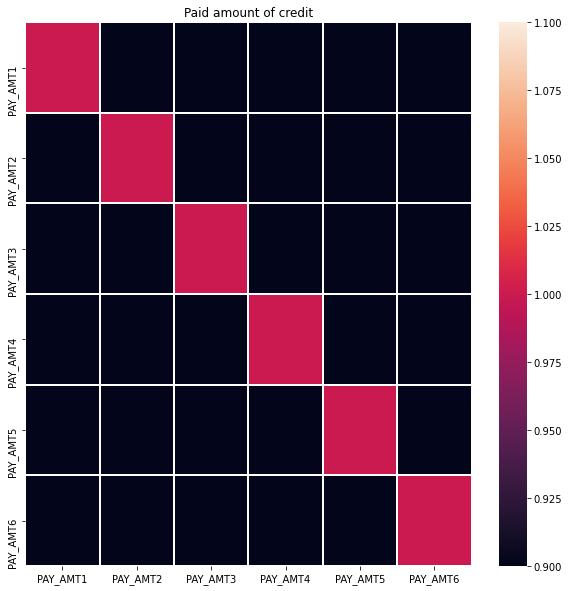

In [12]:
Paid_amount = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
plt.figure(figsize=(10,10))
plt.title("Paid amount of credit")
corr = df[Paid_amount].corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, vmin=1, vmax=1)
plt.show


There is weak correlation between the amount of previous payment across the six months

# Predictive models

Defining the independent and dependent variables

In [13]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     1
BILL_AMT2                     1
BILL_AMT3                     1
BILL_AMT4                     1
BILL_AMT5                     1
BILL_AMT6                     1
PAY_AMT1                      1
PAY_AMT2                      1
PAY_AMT3                      1
PAY_AMT4                      1
PAY_AMT5                      1
PAY_AMT6                      1
default.payment.next.month    1
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
# Getting the target and the predictors
X = df.drop("default.payment.next.month", 1)
y = np.array(df["default.payment.next.month"])

# Splitting the data into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
X.shape, y.shape

((11108, 24), (11108,))

**Random forest classifier**

In [16]:

# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
credit = RandomForestClassifier(n_estimators = 300, random_state=42, min_samples_split = 20, max_depth=5)
credit = credit.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = credit.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,2222.000000,2222.000000
mean,0.226823,0.081908
std,0.418871,0.274287
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [17]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.1926192619261926
Mean Squared Error: 0.1926192619261926
Root Mean Squared Error: 0.43888410990396154


In [18]:
# Checking the accuracy
from sklearn import metrics
print("Accuracy score of random forest:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score of random forest: 80.73807380738074


> **The accuracy is 81.8% which is just slightly higher than the one we got from the Random Forest Model.**

Predicted   0.0  1.0
Actual              
0.0        1665   53
1.0         375  129


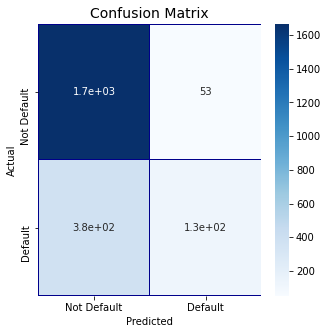

In [19]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

In [20]:
# Get numerical feature importances
importances = list(credit.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.


# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('ID', 0.01), ('LIMIT_BAL', 0.02), ('SEX', 0.0), ('EDUCATION', 0.0), ('MARRIAGE', 0.0), ('AGE', 0.01), ('PAY_0', 0.27), ('PAY_2', 0.15), ('PAY_3', 0.1), ('PAY_4', 0.08), ('PAY_5', 0.09), ('PAY_6', 0.04), ('BILL_AMT1', 0.02), ('BILL_AMT2', 0.01), ('BILL_AMT3', 0.01), ('BILL_AMT4', 0.01), ('BILL_AMT5', 0.01), ('BILL_AMT6', 0.01), ('PAY_AMT1', 0.04), ('PAY_AMT2', 0.03), ('PAY_AMT3', 0.03), ('PAY_AMT4', 0.02), ('PAY_AMT5', 0.01), ('PAY_AMT6', 0.02)]
PAY_0                Importance: 0.27
PAY_2                Importance: 0.15
PAY_3                Importance: 0.1
PAY_5                Importance: 0.09
PAY_4                Importance: 0.08
PAY_6                Importance: 0.04
PAY_AMT1             Importance: 0.04
PAY_AMT2             Importance: 0.03
PAY_AMT3             Importance: 0.03
LIMIT_BAL            Importance: 0.02
BILL_AMT1            Importance: 0.02
PAY_AMT4             Importance: 0.02
PAY_AMT6             Importance: 0.02
ID                   Importance: 0.01
AGE               

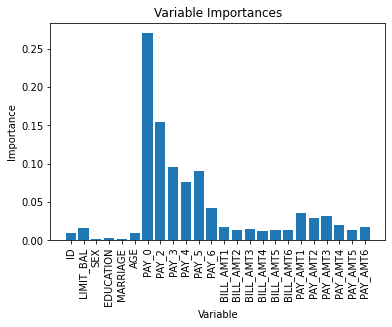

In [21]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [22]:
feat = df[['PAY_0', 'LIMIT_BAL',\
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_classification

X = feat
y = np.array(df["default.payment.next.month"])

clf = AdaBoostClassifier(n_estimators=300, random_state=0)

# Splitting the data into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
X.shape, y.shape


((11108, 19), (11108,))

In [24]:
# Train the model
#
clf.fit(X_train, y_train)

# Predict using the trained model
#
credit_pred = clf.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': credit_pred.flatten()})

comparison.describe()

,Actual,Predicted
count,2222.000000,2222.000000
mean,0.226823,0.116562
std,0.418871,0.320969
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


### AdaBoost

In [25]:
# Checking the accuracy
# -----
# Using AdaBoost
#
from sklearn.metrics import accuracy_score, precision_score, recall_score

credit = AdaBoostClassifier(n_estimators=300)

credit.fit(X_train, y_train)
y_pred = credit.predict(X_test)

print("Accuracy score after AdaBoost:",metrics.accuracy_score(y_test, credit_pred)*100)
print("Precision score after AdaBoost:",metrics.precision_score(y_test, credit_pred)*100)
print("Recall score after AdaBoost:",metrics.recall_score(y_test, credit_pred)*100)

Accuracy score after AdaBoost: 81.14311431143115
Precision score after AdaBoost: 66.40926640926641
Recall score after AdaBoost: 34.12698412698413


Predicted   0.0  1.0
Actual              
0.0        1631   87
1.0         332  172


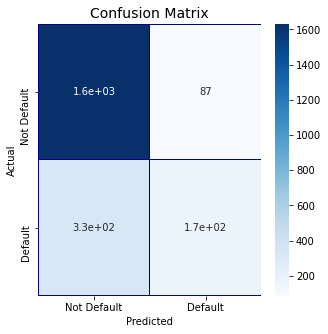

In [26]:
cm = pd.crosstab(y_test, credit_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

### Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

In [28]:
# Using GradientBoosting
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = feat
y = np.array(df["default.payment.next.month"])

# Splitting the data into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
X.shape, y.shape

credit = GradientBoostingClassifier(n_estimators=700)

credit.fit(X_train, y_train)
y_pred = credit.predict(X_test)

print("Accuracy score after GradientBoost:",metrics.accuracy_score(y_test, credit_pred)*100)
print("Precision score after GradientBoost:",metrics.precision_score(y_test, credit_pred)*100)
print("Recall score after GradientBoost:",metrics.recall_score(y_test, credit_pred)*100)

Accuracy score after GradientBoost: 81.14311431143115
Precision score after GradientBoost: 66.40926640926641
Recall score after GradientBoost: 34.12698412698413


Predicted   0.0  1.0
Actual              
0.0        1613  105
1.0         319  185


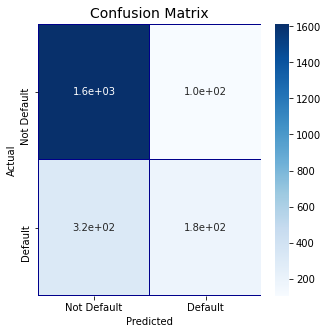

In [29]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

### XGBoost for Classification
> An XGBClassifier on the test problem using repeated k-fold cross-validation and reports the mean accuracy. Then a single model is fit on all available data and a single prediction is made.

In [30]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# Split data into features and Labels
#
X = feat
y = np.array(df["default.payment.next.month"])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# evaluate the model
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy: 80.265 (0.010)


> **The accuracy is 82.124% which is just slightly higher than the one we got from the Random Forest Model.**

In [31]:
# fit the model on the whole dataset
model = XGBClassifier(objective='reg:squarederror')
model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)

print("Accuracy score after GradientBoost:",metrics.accuracy_score(y_test, credit_pred)*100)
print("Precision score after GradientBoost:",metrics.precision_score(y_test, credit_pred)*100)
print("Recall score after GradientBoost:",metrics.recall_score(y_test, credit_pred)*100)

Accuracy score after GradientBoost: 81.14311431143115
Precision score after GradientBoost: 66.40926640926641
Recall score after GradientBoost: 34.12698412698413


**Plotting a Confusion matrix**

Predicted   0.0  1.0
Actual              
0.0        1646   72
1.0         330  174


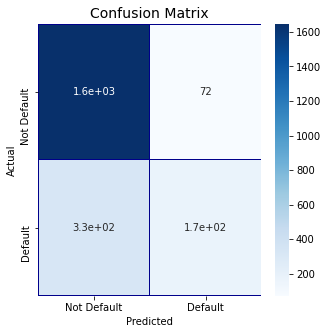

In [32]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

<Figure size 1800x360 with 0 Axes>

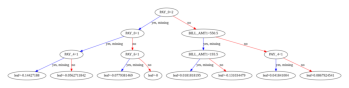

In [33]:
# Create the XGBClassifier Tree Map
#
from xgboost import plot_tree
import matplotlib.pyplot as plt
model = XGBClassifier()
model.fit(X_train, y_train)
# plot single tree
plt.figure(figsize=(25, 5))
plot_tree(model)
plt.show()

### CatBoost

In [34]:
!pip3 install catboost

     |████████████████████████████████| 66.1MB 57kB/s 


In [35]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# evaluate the model


# Split data into features and Labels
#
X = feat
y = np.array(df["default.payment.next.month"])

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.010)


In [36]:
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X_train, y_train)

In [37]:
# make a single prediction
y_pred = model.predict(X_test)
y_pred

print("Accuracy score after CatBoost:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision score after CatBoost:",metrics.precision_score(y_test, y_pred)*100)
print("Recall score after CatBoost:",metrics.recall_score(y_test, y_pred)*100)

Accuracy score after CatBoost: 81.95319531953196
Precision score after CatBoost: 68.45878136200717
Recall score after CatBoost: 37.89682539682539


Predicted   0.0  1.0
Actual              
0.0        1630   88
1.0         313  191


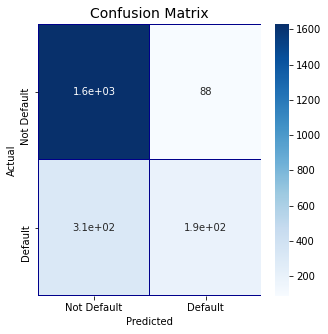

In [38]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()
# 1= default
# 0 = No default

In [41]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [48]:
X.head(2)

,PAY_0,LIMIT_BAL,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,20000.0,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,-1,120000.0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0


In [49]:
X.columns

Index(['PAY_0', 'LIMIT_BAL', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')